[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat", index=False)

In [3]:
carbon_west

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions. 

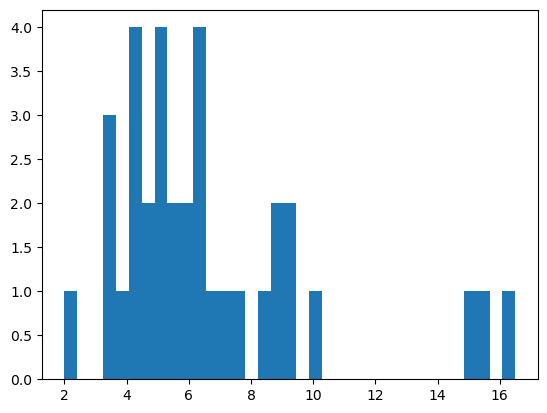

In [7]:
import matplotlib.pyplot as plt
plt.hist(carbon_west['CO2'], bins=len(carbon_west['Nation']), label=carbon_west['Nation'])
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [9]:
co2 = carbon_west['CO2']

In [10]:
mean = co2.mean()
median = co2.median()
stdev = co2.std()
mean, median, stdev

(6.717142857142858, 5.9, 3.3569493954627134)

**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [11]:
murders = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [42]:
murders

,state murder,murder_rate
0,AK 8.4,8.4
1,AL 8.3,8.3
2,AR 8.6,8.6
3,AZ 5.9,5.9
4,CA 4.6,4.6
5,CO 3.9,3.9
6,CT 2.8,2.8
7,DE 5.6,5.6
8,FL 5.0,5.0
9,GA 6.7,6.7


Part a. Find the mean and standard deviation for murders without D.C.

In [18]:
import numpy as np

In [38]:
mur_lst = []
for state_murder in murders['  state             murder   ']:
    state, murder = state_murder.split()
    if 'DC' in state:
        mur_lst.append(np.NaN)
        continue
    mur_lst.append(float(murder))
np_mur = np.array(mur_lst)

In [39]:
murders['murder_rate'] = np_mur

In [53]:
print(f'Mean: {murders["murder_rate"].mean()} Standard Deviation: {murders["murder_rate"].std()}')

Mean: 4.874, Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [57]:
print(f"Min: {murders['murder_rate'].min()} Q1: {murders['murder_rate'].quantile(0.25)} Median: {murders['murder_rate'].median()} Q3: {murders['murder_rate'].quantile(0.75)} Max:{murders['murder_rate'].max()}")

Min: 1.0 Q1: 2.625 Median: 4.85 Q3: 6.175 Max:12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [47]:
murders['murder_rate_DC'] = np.array([float(mur.split()[1]) for mur in murders['  state             murder   ']])

In [58]:
print(f'Mean: {murders["murder_rate_DC"].mean()} Standard Deviation: {murders["murder_rate_DC"].std()}')
print(f"Min: {murders['murder_rate_DC'].min()} Q1: {murders['murder_rate_DC'].quantile(0.25)} Median: {murders['murder_rate_DC'].median()} Q3: {murders['murder_rate_DC'].quantile(0.75)} Max:{murders['murder_rate_DC'].max()}")

Mean: 5.252941176470588 Standard Deviation: 3.7253914125190377
Min: 1.0 Q1: 2.6500000000000004 Median: 5.0 Q3: 6.45 Max:24.2


- The Mean was affected a lot more than the Median with there being a 0.4 difference between means and 0.15 difference between medians
- The Range was greatly affected with a difference of 11.8 compared to >1 difference for IQR

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [4]:
houses = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home. 

Part b. Find the correlation between the two variables.

Part c. Find and plot the regression line on top of the scatterplot. 

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [ ]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat")